In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cluster_data.csv")

In [3]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [4]:
df.shape

(2300, 2)

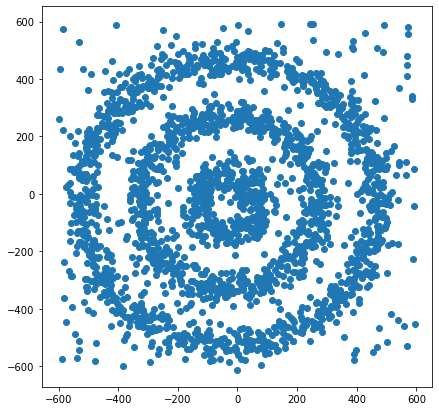

In [5]:
plt.figure(figsize = (7,7))
plt.scatter(df["0"],df["1"])

### Kmeans Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
k =[ 1,2,3,4,5,6,7,8,9,10]
ssd = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0, 0.5, 'SSD- Inertia')

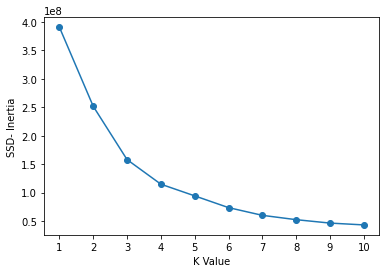

In [10]:
plt.plot(k,ssd,marker = "o")
plt.xticks(k)
plt.xlabel("K Value")
plt.ylabel("SSD- Inertia")

In [13]:
#k=4
model = KMeans(n_clusters = 4)
model.fit(df)
centroid = model.cluster_centers_

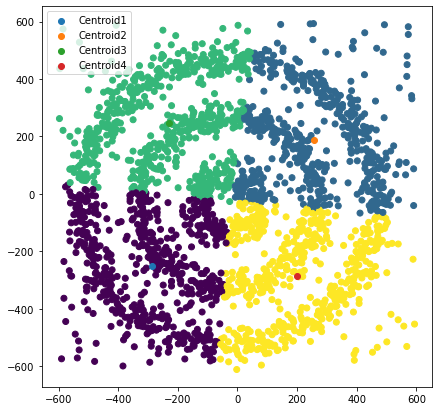

In [15]:
plt.figure(figsize = (7,7))
plt.scatter(df["0"],df["1"], c = model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1], label = "Centroid"+str(i+1))
    plt.legend()

###  Hierrarichical Aggloromative Clustering

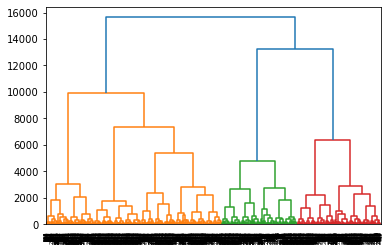

In [16]:
from scipy.cluster import hierarchy
den = hierarchy.dendrogram(hierarchy.linkage(df,method = "ward"))

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5)
model.fit(df)

AgglomerativeClustering(n_clusters=5)

Text(0.5, 1.0, 'Hierrarichical Aggloromative Clustering')

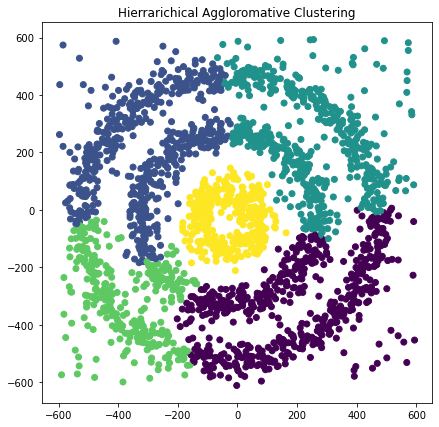

In [18]:
plt.figure(figsize = (7,7))
plt.scatter(df["0"],df["1"], c = model.labels_)
plt.title("Hierrarichical Aggloromative Clustering")

### DBSCAN

In [19]:
from sklearn.neighbors import NearestNeighbors

In [20]:
n = NearestNeighbors(n_neighbors = 2)

In [24]:
n_fit = n.fit(df)
distance,_ = n_fit.kneighbors(df)
distance = np.sort(distance, axis = 0)
distance = distance [:,1] #(all rows but 1 columns)

Text(0, 0.5, 'Epsilon')

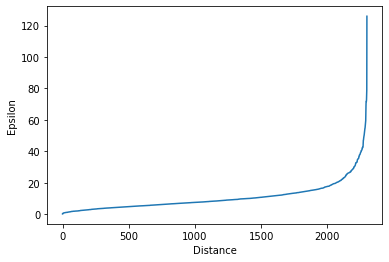

In [26]:
plt.plot(distance)
plt.xlabel ("Distance")
plt.ylabel("Epsilon")

In [28]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 30, min_samples = 3)
model.fit(df)

DBSCAN(eps=30, min_samples=3)

Text(0.5, 1.0, 'DBSCAN Clustering')

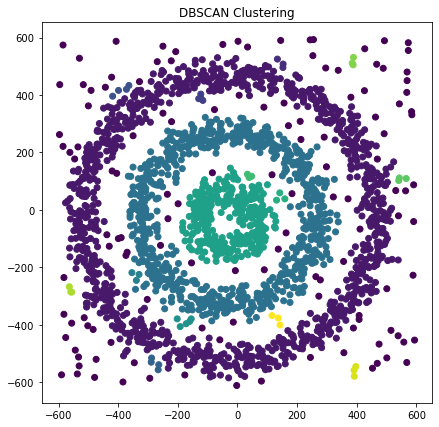

In [29]:
plt.figure(figsize = (7,7))
plt.scatter(df["0"],df["1"], c = model.labels_)
plt.title("DBSCAN Clustering")